In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import datetime
import time
import calendar
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # 导入sklearn库的RandomForestClassifier函数
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 分类结果评价函数
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import matplotlib
import matplotlib as mpl

%matplotlib inline

In [2]:
def load_eq():
    eq = pd.read_csv('final\eq_step3.csv')
    eq.dropna(inplace=True,axis=0)
    label = eq['Label']
    eq = eq[['MAG', 'LAT', 'LON', 'DEPTH', 'NPH', 'NGRM']]
    #eq = eq[['MAG', 'LAT', 'LON', 'DEPTH', 'NPH', 'NGRM', 'Water or Steam Injected (bbl)', 'Gas or Air Injected (Mcf)', 'Oil Produced (bbl)', 'Water Produced (bbl)', 'Gas Produced (Mcf)']]
    return eq, label

In [3]:
def load_new_eq():
    eq = pd.read_csv('final\eq_step1.csv')
    temp = pd.read_csv('final\eq_step2.csv')
    eq = pd.concat([eq, temp])
    temp = pd.read_csv('final\eq_step3.csv')
    eq = pd.concat([eq, temp])
    eq.dropna(inplace=True,axis=0)
    label = eq['Label']
    eq = eq[['MAG', 'LAT', 'LON', 'DEPTH', 'NPH', 'NGRM', 'Water or Steam Injected (bbl)', 'Gas or Air Injected (Mcf)', 'Oil Produced (bbl)', 'Water Produced (bbl)', 'Gas Produced (Mcf)']]
    return eq, label

In [4]:
EQ, y = load_eq()
X_train, X_test, y_train, y_test = train_test_split(EQ, y, test_size=0.2)
EQ.dropna(inplace=True,axis=0)
EQ.index[np.where(np.isnan(EQ))[0]] 
EQ = EQ[np.isfinite(EQ.T).all()]
r = EQ.index[np.isinf(EQ).any(1)]
print(r)

Int64Index([], dtype='int64')


C:\Users\omen of Hansen\AppData\Local\Temp\ipykernel_23712\4025607264.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  r = EQ.index[np.isinf(EQ).any(1)]


In [5]:
EQ, y = load_new_eq()
EQ = EQ[np.isfinite(EQ.T).all()]
X_train, X_test, y_train, y_test = train_test_split(EQ, y, test_size=0.2)
GNB = GaussianNB().fit(X_train, y_train)
expected = y_test  # 测试样本的期望输出
predicted = GNB.predict(X_test)  # 测试样本预测
print(metrics.classification_report(expected, predicted))
print ("Gaussian Naive Bayes Classifier Score:", GNB.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      7553
           1       0.92      0.64      0.76      5340

    accuracy                           0.83     12893
   macro avg       0.85      0.80      0.81     12893
weighted avg       0.84      0.83      0.82     12893

Gaussian Naive Bayes Classifier Score: 0.8283564725044598


In [6]:
RF_model = RandomForestClassifier()  # 实例化模型RandomForestClassifier
RF_model.fit(X_train, y_train)  # 在训练集上训练模型
print(RF_model)  # 输出模型RandomForestClassifier

# 在测试集上测试模型
expected = y_test  # 测试样本的期望输出
predicted = RF_model.predict(X_test)  # 测试样本预测

# 输出结果
print(metrics.classification_report(expected, predicted))  # 输出结果，精确度、召回率、f-1分数
print(metrics.confusion_matrix(expected, predicted))  # 混淆矩阵

#auc = metrics.roc_auc_score(y_test, predicted)
accuracy = metrics.accuracy_score(y_test, predicted)  # 求精度
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ("Random Forest Classifier Score:", RF_model.score(X_test, y_test))

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7553
           1       0.99      0.99      0.99      5340

    accuracy                           0.99     12893
   macro avg       0.99      0.99      0.99     12893
weighted avg       0.99      0.99      0.99     12893

[[7480   73]
 [  52 5288]]
Accuracy: 99.03%
Random Forest Classifier Score: 0.9903048165671294


In [7]:
params = {'n_estimators': 500, # 弱分类器的个数
          'max_depth': 3,       # 弱分类器（CART回归树）的最大深度
          'min_samples_split': 5, # 分裂内部节点所需的最小样本数
          'learning_rate': 0.05,  # 学习率
          'loss': 'log_loss'}           # 损失函数：对数误差损失函数

GBDTreg = GradientBoostingClassifier(**params)
GBDTreg.fit(X_train, y_train)
y_predict = GBDTreg.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0117


In [8]:
expected = y_test  # 测试样本的期望输出
predicted = GBDTreg.predict(X_test)  # 测试样本预测
print(metrics.classification_report(expected, predicted))
print ("GBDT Classifier Score:", GBDTreg.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7553
           1       0.98      0.99      0.99      5340

    accuracy                           0.99     12893
   macro avg       0.99      0.99      0.99     12893
weighted avg       0.99      0.99      0.99     12893

GBDT Classifier Score: 0.9882882184130923


C:\Users\omen of Hansen\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


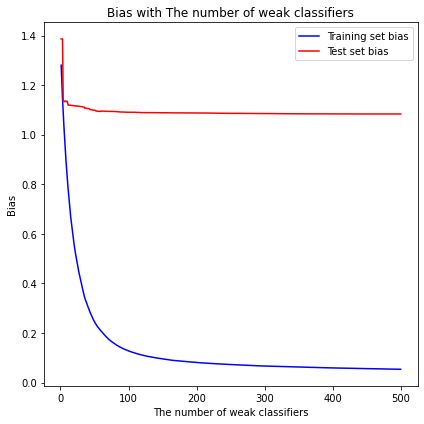

In [9]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(GBDTreg.staged_predict(X_test)):
    test_score[i] = GBDTreg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Bias with The number of weak classifiers')
plt.plot(np.arange(params['n_estimators']) + 1, GBDTreg.train_score_, 'b-',
         label='Training set bias')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test set bias')
plt.legend(loc='upper right')
plt.xlabel('The number of weak classifiers')
plt.ylabel('Bias')
fig.tight_layout()

In [10]:
x = np.array([1.46, 33.909, -117.994, 5.3, 37, 2071, 6447073, 3148, 141479, 7346593, 100979])

x = x.reshape(1, -1)
y1 = GNB.predict(x)
y2 = RF_model.predict(x)
y3 = GBDTreg.predict(x)
print(y1)
print(y2)
print(y3)

[0]
[1]
[1]


C:\Users\omen of Hansen\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\omen of Hansen\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\omen of Hansen\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [11]:
x = np.array([2.67, 34.444, -117.991, 4.7, 81, 117, 100, 100, 1000, 1000, 100])#9736 actually is negative
x = x.reshape(1, -1)
y1 = GNB.predict(x)
y2 = RF_model.predict(x)
y3 = GBDTreg.predict(x)
print(y1)
print(y2)
print(y3)

[0]
[0]
[0]


C:\Users\omen of Hansen\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\omen of Hansen\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\omen of Hansen\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
